# **Import Libraries and modules**

In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

Using TensorFlow backend.


### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


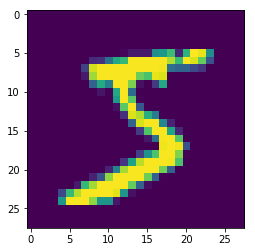

In [3]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [6]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [8]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
def ConvBnDropout(model,size,dout=0.2,K=(3,3)):
  
  model.add(Convolution2D(size, kernel_size=K, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(dout))
  return model  
  
  
  

### No architectural changes 
### Adding 
            1) Batch Normalization 
            2) Dropout
            3) Avoiding dropouts at 1*1 transitions

In [13]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())

model=ConvBnDropout(model,16)
model=ConvBnDropout(model,24)

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model=ConvBnDropout(model,10,0,K=(1,1))

model=ConvBnDropout(model,16)
model=ConvBnDropout(model,24)

model=ConvBnDropout(model,10,0,K=(1,1))

model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_7 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 24)        3480      
_________________________________________________________________
batch_normalization_10 (Batc (None, 22, 22, 24)        96        
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


In [16]:
model.fit(X_train, Y_train, batch_size=32, 
          epochs=20, verbose=1, 
          validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 24s 397us/step - loss: 0.2113 - acc: 0.9339 - val_loss: 0.0622 - val_acc: 0.9798
Epoch 2/20
60000/60000 [==============================] - 22s 367us/step - loss: 0.0691 - acc: 0.9788 - val_loss: 0.0410 - val_acc: 0.9874
Epoch 3/20
60000/60000 [==============================] - 21s 351us/step - loss: 0.0550 - acc: 0.9828 - val_loss: 0.0350 - val_acc: 0.9885
Epoch 4/20
60000/60000 [==============================] - 21s 348us/step - loss: 0.0480 - acc: 0.9849 - val_loss: 0.0365 - val_acc: 0.9870
Epoch 5/20
60000/60000 [==============================] - 21s 345us/step - loss: 0.0430 - acc: 0.9863 - val_loss: 0.0326 - val_acc: 0.9898
Epoch 6/20
60000/60000 [==============================] - 22s 362us/step - loss: 0.0382 - acc: 0.9879 - val_loss: 0.0327 - val_acc: 0.9890
Epoch 7/20
60000/60000 [==============================] - 21s 343us/

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [18]:
print(score)

[0.024732927495142214, 0.9919]


In [23]:
model.fit(X_train, Y_train, batch_size=32, 
          epochs=20, verbose=1, 
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 22s 366us/step - loss: 0.0201 - acc: 0.9931 - val_loss: 0.0245 - val_acc: 0.9930
Epoch 2/20
60000/60000 [==============================] - 21s 346us/step - loss: 0.0206 - acc: 0.9935 - val_loss: 0.0208 - val_acc: 0.9935
Epoch 3/20
60000/60000 [==============================] - 21s 346us/step - loss: 0.0184 - acc: 0.9942 - val_loss: 0.0222 - val_acc: 0.9931
Epoch 4/20
60000/60000 [==============================] - 22s 363us/step - loss: 0.0188 - acc: 0.9937 - val_loss: 0.0218 - val_acc: 0.9935
Epoch 5/20
60000/60000 [==============================] - 22s 374us/step - loss: 0.0195 - acc: 0.9934 - val_loss: 0.0224 - val_acc: 0.9928
Epoch 6/20
60000/60000 [==============================] - 21s 351us/step - loss: 0.0181 - acc: 0.9940 - val_loss: 0.0239 - val_acc: 0.9921
Epoch 7/20
60000/60000 [==============================] - 21s 343us/step - loss: 0.0176 - acc: 0.9942 - val_loss: 0.

In [26]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.021712733812696387, 0.9938]


### The highest accuracy achieved is 99.4

In [0]:
y_pred = model.predict(X_test)

In [25]:
print(y_pred[:9])
print(y_test[:9])

[[3.38841436e-14 9.65216882e-12 8.91998653e-09 9.71065148e-08
  4.34960038e-13 1.71765445e-12 4.46948031e-15 9.99999762e-01
  8.03541966e-13 1.60611137e-07]
 [3.78389373e-08 1.16221554e-06 9.99958634e-01 1.76450632e-09
  1.99397499e-09 2.32824204e-13 4.02060250e-05 1.58971239e-11
  4.51575943e-10 1.94869659e-11]
 [7.31671557e-10 9.99999046e-01 5.50213386e-08 1.05708644e-07
  1.07452195e-07 1.29242153e-07 1.29013841e-07 4.01585197e-07
  1.88162907e-08 8.15749246e-08]
 [9.99994636e-01 4.04445141e-13 2.16153531e-08 2.53451371e-09
  4.32713310e-11 1.33561454e-10 3.16144951e-06 1.25331134e-10
  9.32993682e-09 2.18745913e-06]
 [1.62184519e-11 5.77031738e-12 7.70575184e-12 2.32182936e-12
  1.00000000e+00 4.63529327e-14 2.02925254e-09 2.65095476e-12
  7.57608004e-11 2.62122022e-08]
 [7.17244111e-11 9.99994874e-01 9.27908133e-08 1.32634517e-08
  5.19517698e-07 1.74534664e-09 2.43539837e-08 4.23478286e-06
  4.76769424e-09 2.72872796e-07]
 [1.68778870e-14 1.75791577e-08 5.20469605e-11 3.09075492e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

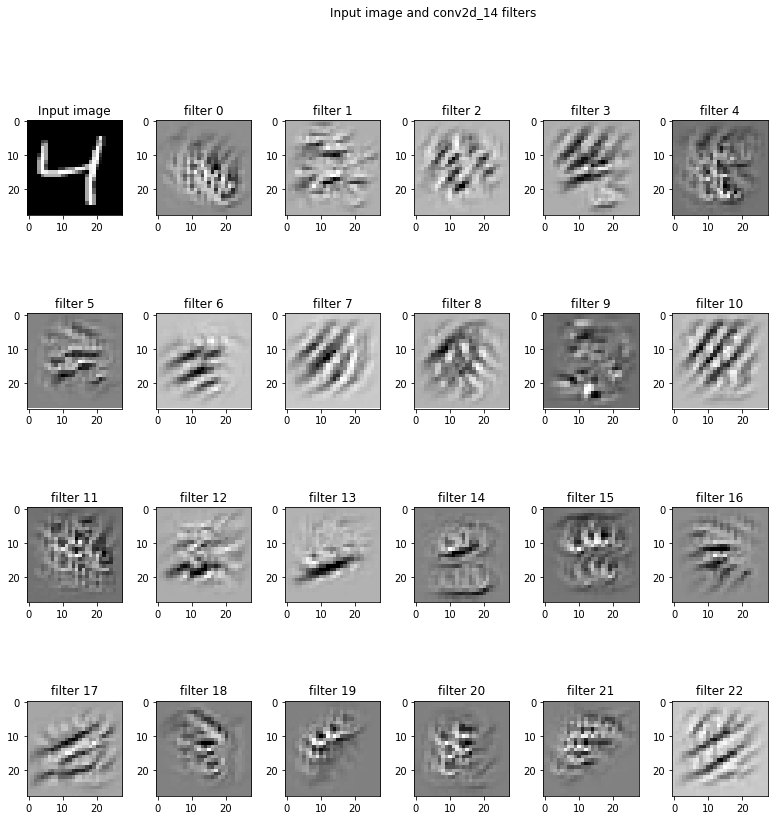

In [22]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()